In [7]:
import  requests
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

# fetch 30 minute klines last 500
r = requests.get('https://api.binance.com/api/v1/klines?symbol=ARKBTC&interval=30m&startTime=1543626000000&limit=1000')

#[
#  [
#  0  1499040000000,      // Open time 
#  1  "0.01634790",       // Open
#  2  "0.80000000",       // High
#  3  "0.01575800",       // Low
#  4  "0.01577100",       // Close
#  5  "148976.11427815",  // Volume
#  6  1499644799999,      // Close time
#  7  "2434.19055334",    // Quote asset volume
#  8  308,                // Number of trades
#  9  "1756.87402397",    // Taker buy base asset volume
#  10 "28.46694368",      // Taker buy quote asset volume
#  11 "17928899.62484339" // Ignore.
#  ]
#]

In [8]:
#Transfomre the tab in a dict 
Candlesticks = [[0]*12 for i in range(0,1000)]
for i,Candlestick in enumerate(r.json()):
    Candlesticks[i][0] = Candlestick[0]
    Candlesticks[i][1] = float(Candlestick[1])
    Candlesticks[i][2] = float(Candlestick[2])
    Candlesticks[i][3] = float(Candlestick[3])
    Candlesticks[i][4] = float(Candlestick[4])
    Candlesticks[i][5] = float(Candlestick[5])
    Candlesticks[i][6] = Candlestick[6]
    Candlesticks[i][7] = float(Candlestick[7])
    Candlesticks[i][8] = Candlestick[8]
    Candlesticks[i][9] = float(Candlestick[9])
    Candlesticks[i][10] = float(Candlestick[10])
    Candlesticks[i][11] = float(Candlestick[11])


## Data Visualization  

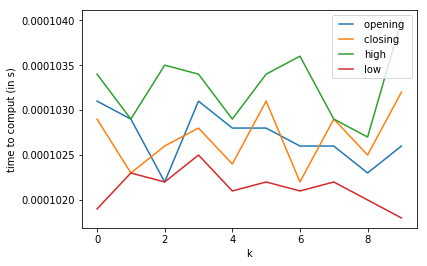

In [9]:
opening_price = [Candlestick[1] for Candlestick in Candlesticks]
closing_price = [Candlestick[4] for Candlestick in Candlesticks]
high_price = [Candlestick[2] for Candlestick in Candlesticks]
low_price = [Candlestick[3] for Candlestick in Candlesticks]
first = 202
size = 10

x= [i for i in range(0,size)]


import matplotlib.pyplot as plt
plt.plot(x,opening_price[first:first+size], label="opening ")
plt.plot(x,closing_price[first:first+size], label="closing ")
plt.plot(x,high_price[first:first+size], label="high")
plt.plot(x,low_price[first:first+size], label="low")

plt.ylabel('time to comput (in s)')
plt.xlabel('k')
plt.legend(numpoints=2)
plt.show()

## Definition of the best time window betwenne buying and selling 
with a 1 hour time window we managed to increase 20% the wallet in the 20 first days of December

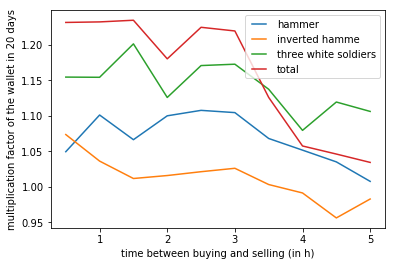

In [12]:
import findPatterns as findPatterns

hammer_tab = [1]*10
in_hammer_tab = [1]*10
soldiers_tab = [1]*10
total = [1]*10
for i in range(0, 989): 
    if findPatterns.test_hammer(Candlesticks[i:i+10]): 
        for j in range(0, 10): 
            sell_time = i+j+11 if i+j+11 < 1000 else 999
            hammer_tab[j] *= (1+(Candlesticks[sell_time][1]- Candlesticks[i][1])/Candlesticks[i][1])
    
    if findPatterns.test_inverted_hammer(Candlesticks[i:i+10]): 
        for j in range(0, 10): 
            sell_time = i+j+11 if i+j+11 < 1000 else 999
            in_hammer_tab[j] *= (1+(Candlesticks[sell_time][1]- Candlesticks[i][1])/Candlesticks[i][1])
            
    if findPatterns.test_three_white_soldiers(Candlesticks[i:i+10]): 
        for j in range(0, 10): 
            sell_time = i+j+11 if i+j+11 < 1000 else 999
            soldiers_tab[j] *= (1+(Candlesticks[sell_time][1]- Candlesticks[i][1])/Candlesticks[i][1])
            
    if findPatterns.test_hammer(Candlesticks[i:i+10]) or findPatterns.test_inverted_hammer(Candlesticks[i:i+10]) or findPatterns.test_three_white_soldiers(Candlesticks[i:i+10]): 
        for j in range(0, 10): 
            sell_time = i+j+11 if i+j+11 < 1000 else 999
            total[j] *= (1+(Candlesticks[sell_time][1]- Candlesticks[i][1])/Candlesticks[i][1])

x = [0.5*i for i in range(1,11)]            
plt.plot(x,hammer_tab, label="hammer")
plt.plot(x,in_hammer_tab, label="inverted hamme ")
plt.plot(x,soldiers_tab, label="three white soldiers")
plt.plot(x,total, label="total")

plt.ylabel('multiplication factor of the wallet in 20 days')
plt.xlabel('time between buying and selling (in h)')
plt.legend(numpoints=2)
plt.show()